<a href="https://colab.research.google.com/github/zeybit/veri_analizi_project/blob/main/verianalizi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Kütüphanelerin Yüklenmesi**


Bu adımda, gerekli kütüphaneler projeye dahil ediliyor. Kullandığımız kütüphaneler;

1-)Veri manipülasyonu ve analizi için *pandas* kütüphanesi:
import pandas as pd

2-) Bilimsel hesaplama için *numpy kütüphanesi*:
import numpy as np

3-)Grafik çizimleri için *matplotlib.pyplot* kütüphanesi:
import matplotlib.pyplot as plt

 4-)Veri görselleştirmesi için *seaborn* kütüphanesi:
import seaborn as sns

5-)Özellik seçimi için *sklearn* kütüphanesi:
from sklearn.feature_selection import SelectKBest, f_regression



In [ ]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.feature_selection import SelectKBest, f_regression

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

**2. Verinin Yüklenmesi**

CSV dosyasından veri yüklenir. Bu veri dosyası, World Happiness Report 2024'ü içerir.

In [ ]:
df = pd.read_csv("World-happiness-report-2024.csv")

**3. Veriyi Keşfetme**

Veri setinin genel yapısını anlamak için ilk birkaç satırına bakılır ve veri setinin özet bilgileri çıkarılır.

In [ ]:
# İlk birkaç satırı görüntüleyerek verinin genel yapısını inceleyin
print(df.head())

# Veri setinin yapısını özetleyin (sütun isimleri, veri tipleri, eksik değerler)
print(df.info())

# Veri setinin temel istatistiksel özetini çıkarın (ortalama, standart sapma, min, max vs.)
print(df.describe())


**4. Veri Temizleme ve Ön İşleme**

Eksik verilerin kontrolü ve işlenmesi. Eksik veriler varsa, bu verilerin nasıl ele alınacağı belirlenir. Örneğin, eksik veriler silinebilir veya doldurulabilir.

In [ ]:
# Eksik verileri kontrol edin (her sütunda kaç tane eksik değer var)
print(df.isnull().sum())

# Eksik verileri içeren satırları kaldırın (alternatif olarak eksik verileri doldurabilirsiniz)
df = df.dropna()  # Eksik verileri içeren satırları kaldırma



Country name                    0
Regional indicator              0
Ladder score                    0
upperwhisker                    0
lowerwhisker                    0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


 Aykırı değerleri tespit edilmesi için kutu grafiğinin kullanılması için column ismi kontrolü

In [ ]:
# Veri setindeki sütun isimlerini kontrol edin
print(df.columns)


Index(['Country name', 'Regional indicator', 'Ladder score', 'upperwhisker', 'lowerwhisker',
       'Log GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity', 'Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')


**5. Aykırı Değerlerin Tespiti ve Düzeltilmesi**

Aykırı değerleri tespit etmek için kutu grafiği kullanılır. Tespit edilen aykırı değerler, verinin alt ve üst sınırlarının dışında kalan değerlerdir ve bunlar veri setinden çıkarılır.

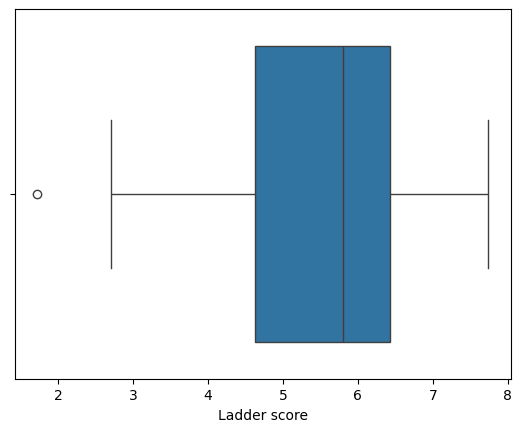

In [ ]:
# Aykırı değerleri tespit etmek için kutu grafiği kullanın
sns.boxplot(x=df['Ladder score'])
plt.show()

# Aykırı değerleri kaldırma (örneğin, %1 ve %99 aralığının dışında olanları)
Q1 = df['Ladder score'].quantile(0.01)
Q3 = df['Ladder score'].quantile(0.99)
IQR = Q3 - Q1
df = df[(df['Ladder score'] >= (Q1 - 1.5 * IQR)) & (df['Ladder score'] <= (Q3 + 1.5 * IQR))]


**6. Temel İstatistiksel Analizler**

Veri setinin temel istatistiksel özellikleri incelenir. Bu, verinin merkezi eğilim ve dağılımını anlamamıza yardımcı olur.

In [ ]:
# Ortalama, medyan, standart sapma gibi temel istatistikler
mean_score = df['Ladder score'].mean()
median_score = df['Ladder score'].median()
std_score = df['Ladder score'].std()

print(f"Mean Ladder Score: {mean_score}")
print(f"Median Ladder Score: {median_score}")
print(f"Standard Deviation: {std_score}")


Mean Ladder Score: 5.530892857142858
Median Ladder Score: 5.8004999999999995
Standard Deviation: 1.181246864082799


**7. Görselleştirme**

Verilerin görselleştirilmesi, veri setindeki desenleri ve ilişkileri daha iyi anlamamıza yardımcı olur. Histogram, scatter plot ve kutu grafiği gibi araçlar kullanılır.

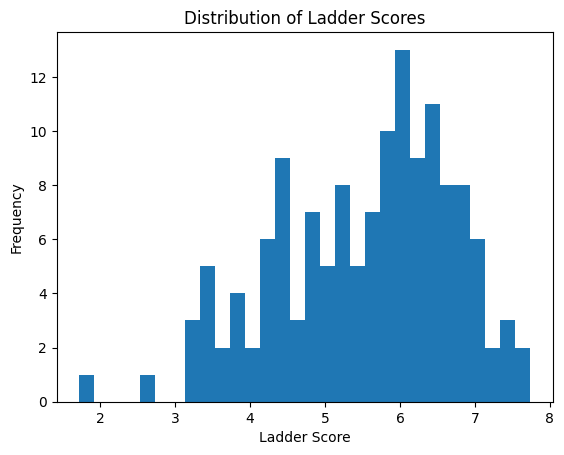

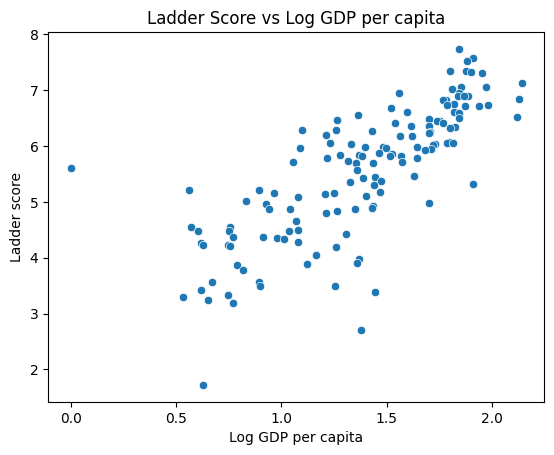

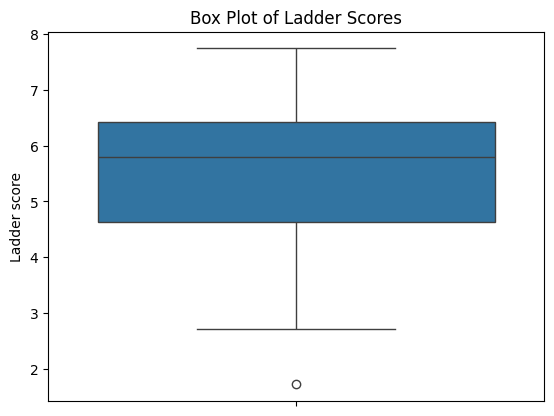

In [ ]:
# Histogram
plt.hist(df['Ladder score'], bins=30)
plt.xlabel('Ladder Score')
plt.ylabel('Frequency')
plt.title('Distribution of Ladder Scores')
plt.show()

# Scatter Plot (Dağılım Grafiği)
sns.scatterplot(x='Log GDP per capita', y='Ladder score', data=df)
plt.title('Ladder Score vs Log GDP per capita')
plt.show()

# Kutu grafiği
sns.boxplot(y='Ladder score', data=df)
plt.title('Box Plot of Ladder Scores')
plt.show()


**8. Değişkenler Arası İlişkilerin Analizi**

Değişkenler arasındaki ilişkiler korelasyon matrisi ve ısı haritası ile incelenir. Bu analiz, hangi değişkenlerin birbirleriyle ilişkili olduğunu anlamaya yardımcı olur.

                              Ladder score  upperwhisker  lowerwhisker  Log GDP per capita  \
Ladder score                         1.000         1.000         1.000               0.769   
upperwhisker                         1.000         1.000         0.999               0.762   
lowerwhisker                         1.000         0.999         1.000               0.775   
Log GDP per capita                   0.769         0.762         0.775               1.000   
Social support                       0.814         0.812         0.815               0.727   
Healthy life expectancy              0.760         0.751         0.768               0.830   
Freedom to make life choices         0.644         0.646         0.642               0.415   
Generosity                           0.130         0.130         0.130              -0.059   
Perceptions of corruption            0.452         0.449         0.454               0.444   
Dystopia + residual                  0.534         0.542    

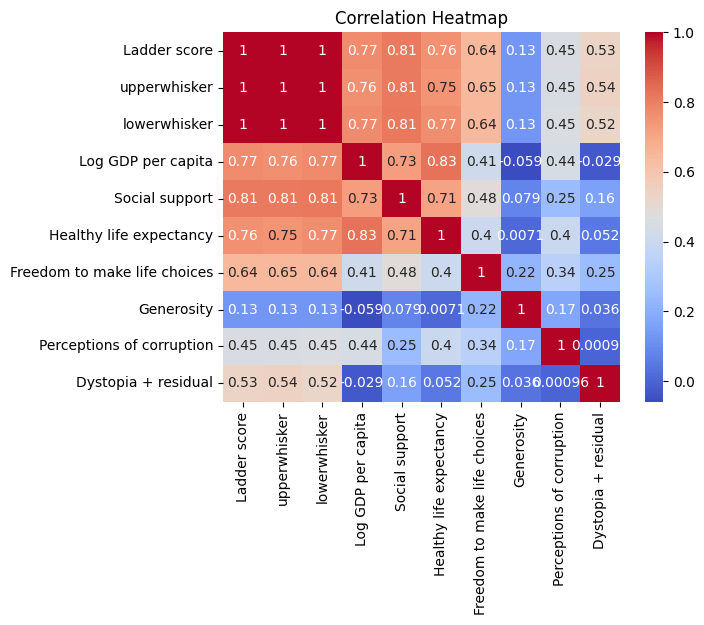

In [ ]:
# Sadece sayısal sütunları seçin
numeric_df = df.select_dtypes(include=[np.number])

# Korelasyon matrisini oluşturun
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

# Korelasyon ısı haritası
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


**9. Feature Selection (Özellik Seçimi)**

Özellik seçimi, veri setindeki en önemli değişkenleri belirlemek için kullanılır. Bu adımda SelectKBest ve f_regression teknikleri kullanılır.

In [ ]:


# Sadece sayısal sütunları seçin (Feature Selection için)
X = df[['Log GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Dystopia + residual']]
y = df['Ladder score']

# Sayısal olmayan sütunları kaldırın
X = X.select_dtypes(include=[np.number])

# En iyi özellikleri seçin
selector = SelectKBest(score_func=f_regression, k=5)
selector.fit(X, y)
selected_features = X.columns[selector.get_support()]

print("Selected Features: ", selected_features)


Selected Features:  Index(['Log GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Dystopia + residual'],
      dtype='object')


**10. Özellik Mühendisliği**

Yeni özelliklerin oluşturulması ve veri setini iyileştirme. Bu adımda, var olan özelliklerin kombinasyonları veya dönüşümleri yapılır.

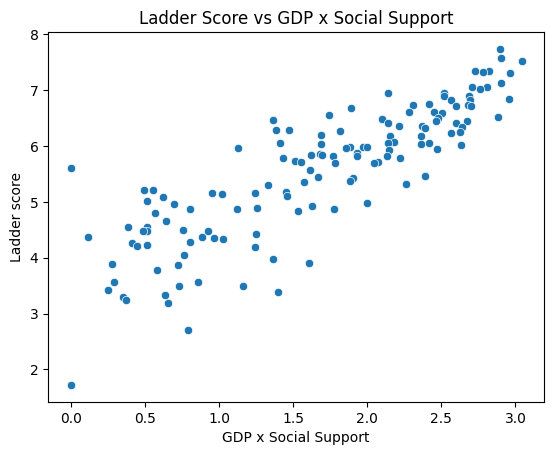

In [ ]:
# Var olan özelliklerin kombinasyonları veya dönüşümleri
df['GDP x Social Support'] = df['Log GDP per capita'] * df['Social support']

# Yeni özelliklerin analizi
sns.scatterplot(x='GDP x Social Support', y='Ladder score', data=df)
plt.title('Ladder Score vs GDP x Social Support')
plt.show()
